In [17]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt


In [18]:
dataframe = pd.read_csv('BTC-USD.csv')

In [19]:
print(dataframe.shape)

(1985, 7)


In [20]:
dataframe = dataframe.filter(['Date','Close'])

In [21]:
prediction_days = 22

In [22]:
dataframe['Prediction'] = dataframe['Close'].shift(-prediction_days)

In [23]:
dataframe.tail(30)

,Date,Close,Prediction
1955,2020-01-24,8445.434570,9889.424805
1956,2020-01-25,8367.847656,9934.433594
1957,2020-01-26,8596.830078,9690.142578
1958,2020-01-27,8909.819336,10141.996094
1959,2020-01-28,9358.589844,9633.386719
1960,2020-01-29,9316.629883,9608.475586
1961,2020-01-30,9508.993164,9686.441406
1962,2020-01-31,9350.529297,9646.580078
1963,2020-02-01,9392.875000,NaN
1964,2020-02-02,9344.365234,NaN


In [24]:
x = dataframe['Close']
x = x[:-prediction_days]
x = np.array(x)
x = np.reshape(x,(len(x),1))
x.shape

(1963, 1)

In [25]:
y = dataframe['Prediction']
y = y[:-prediction_days]
y.shape

(1963,)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [27]:
x_prediction = dataframe['Close']
x_prediction = x_prediction[-prediction_days:]
x_prediction = np.array(x_prediction)
x_prediction = np.reshape(x_prediction,(len(x_prediction),1))
x_prediction.shape

(22, 1)

In [28]:
clf = LinearRegression()
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
confidence = clf.score(x_test, y_test)
print("confidence: ", confidence)

confidence:  0.841543586764856


In [30]:
prediction = clf.predict(x_prediction)

In [31]:
date = dataframe['Date']
date = date[-prediction_days:]

In [34]:
for (d,original,predicted) in zip(date,x_prediction,prediction):
    print('Date:',d,' Original Price:',original[0],' Predicted Price',predicted)

Date: 2020-02-01  Original Price: 9392.875  Predicted Price 9158.847711730199
Date: 2020-02-02  Original Price: 9344.365234  Predicted Price 9113.108282133278
Date: 2020-02-03  Original Price: 9293.521484  Predicted Price 9065.168159652203
Date: 2020-02-04  Original Price: 9180.962891  Predicted Price 8959.03765718695
Date: 2020-02-05  Original Price: 9613.423828  Predicted Price 9366.801252280962
Date: 2020-02-06  Original Price: 9729.801758  Predicted Price 9476.532973845442
Date: 2020-02-07  Original Price: 9795.943359  Predicted Price 9538.897304820923
Date: 2020-02-08  Original Price: 9865.119141  Predicted Price 9604.12253824301
Date: 2020-02-09  Original Price: 10116.673828  Predicted Price 9841.311229192612
Date: 2020-02-10  Original Price: 9856.611328  Predicted Price 9596.10059656353
Date: 2020-02-11  Original Price: 10208.236328  Predicted Price 9927.644701146855
Date: 2020-02-12  Original Price: 10326.054688  Predicted Price 10038.734591426772
Date: 2020-02-13  Original Pri

In [36]:
x_prediction = np.reshape(x_prediction,(len(x_prediction)))

array([ 9392.875   ,  9344.365234,  9293.521484,  9180.962891,
        9613.423828,  9729.801758,  9795.943359,  9865.119141,
       10116.673828,  9856.611328, 10208.236328, 10326.054688,
       10214.379883, 10312.116211,  9889.424805,  9934.433594,
        9690.142578, 10141.996094,  9633.386719,  9608.475586,
        9686.441406,  9646.580078])

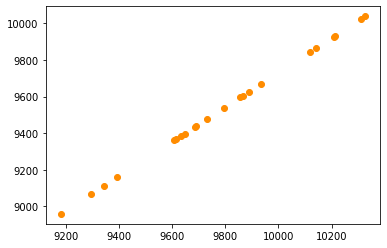

In [37]:
plt.scatter(x_prediction, prediction, color='darkorange', label='data')